In [28]:
# 1. Import packages
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [29]:
from keras import layers,losses,metrics,activations,callbacks,regularizers,optimizers
import numpy as np
import pandas as pd
import os,datetime,pickle,sklearn,mlflow,datetime

In [30]:
# 2. Load the data
# LOAD THE DATA
CSV_PATH = os.path.join(os.getcwd(),'dataset','ecommerceDataset.csv')
df=pd.read_csv(CSV_PATH,names=["Sentiment", "Text"])
print(df.head())

df.info()

   Sentiment                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  50425 non-null  object
 1   Text       50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [31]:
df.Sentiment.value_counts()

Sentiment
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [32]:
#inspect data
print(df.head())
print(df.info()) #one null value both are object
print(df['Sentiment'].unique()) #['Household' 'Books' 'Clothing & Accessories' 'Electronics']

   Sentiment                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  50425 non-null  object
 1   Text       50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
['Household' 'Books' 'Clothing & Accessories' 'Electronics']


In [33]:
# 3. Data inspection
print(df['Sentiment'][0])
print(df['Text'][0])
nClass = len(df['Sentiment'].unique())
print("Categories: ", df['Sentiment'].unique())
print("Number of categories: ", nClass)

Household
Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for ete

In [34]:
print(df.iloc[4,1])

Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Will Email You The Preview Before Making The Final Product. Do You Want The Best Moment Of Your Life To Be Engraved On A Wooden Plaque That Lasts For A Longer Time And Stays Close To You Forever? Then You Are At The Right Place. We Present To You Various Sizes Personalized Engraved Wooden Plaques Made With Birch Wood. Let Your Memories Be Engraved On Wooden Plaques And Stay With Your Forever.


In [35]:
'''
Unequal distribution between class might reduced accuracy.
Solution possible: extract more data for the lacking category or duplicate data
Hence check data if duplicates exist and compare 
'''
print(df.count())
nClass = len(df['Sentiment'].value_counts())
Class = df['Sentiment'].value_counts()
print('number of unique class',nClass)
print(Class)
print('')
print("duplicated values: ",df.duplicated().sum())
print('')
df_drop = df.copy().drop_duplicates()
nClass = len(df_drop['Sentiment'].value_counts())
Class = df_drop['Sentiment'].value_counts()
print('number of unique class',nClass)
print(Class)
print(df.count())

Sentiment    50425
Text         50424
dtype: int64
number of unique class 4
Sentiment
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

duplicated values:  22622

number of unique class 4
Sentiment
Household                 10564
Books                      6256
Clothing & Accessories     5675
Electronics                5308
Name: count, dtype: int64
Sentiment    50425
Text         50424
dtype: int64


In [36]:
print("Missing values:\n", df.isna().sum())
print("Duplicates: ", df.duplicated().sum())

Missing values:
 Sentiment    0
Text         1
dtype: int64
Duplicates:  22622


In [37]:
#Drop duplicates in books to balance the distribution
df_drop = df[~((df['Sentiment']=='Household') & (df.duplicated()))]
#print(df.head())
print(df_drop['Sentiment'].value_counts())
df = df_drop

Sentiment
Books                     11820
Electronics               10621
Household                 10564
Clothing & Accessories     8671
Name: count, dtype: int64


In [38]:
# drop null
df = df.dropna()
print(df.isna().sum())

Sentiment    0
Text         0
dtype: int64


In [39]:
#Drop duplicates in books to balance the distribution
df_drop = df[~((df['Sentiment']=='Household') & (df.duplicated()))]
#print(df.head())
print(df_drop['Sentiment'].value_counts())
df = df_drop

Sentiment
Books                     11820
Electronics               10621
Household                 10564
Clothing & Accessories     8670
Name: count, dtype: int64


In [40]:
# drop null
df = df.dropna()
print(df.isna().sum())

Sentiment    0
Text         0
dtype: int64


In [41]:
# 4. Split into feature and label
feature = df['Text'].values  # Use 'review' as the text feature (assuming 'text' corresponds to 'review')
label = df['Sentiment'].values  # Use 'sentiment' as the category label (assuming sentiment is the label)
# Encode the label
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoded = label_encoder.fit_transform(label)
print(np.unique(label_encoded))
print(label_encoder.inverse_transform(np.unique(label_encoded)))


[0 1 2 3]
['Books' 'Clothing & Accessories' 'Electronics' 'Household']


In [42]:
# 5. Data splitting
seed = 42
x_train,x_split,y_train,y_split = sklearn.model_selection.train_test_split(feature,label_encoded,train_size=0.7,random_state=seed)
x_val,x_test,y_val,y_test = sklearn.model_selection.train_test_split(x_split,y_split,test_size=0.5,random_state=seed)

In [ ]:
# 6. NLP processes
# (A) Tokenization
vocab_size = 5000
tokenizer = layers.TextVectorization(max_tokens=vocab_size,output_sequence_length=250)
tokenizer.adapt(x_train)


In [44]:
# Test out the tokenizer
print(tokenizer.get_vocabulary())
sample_texts = x_train[:2]
sample_tokens = tokenizer(sample_texts)
print(sample_texts[0])
print(sample_tokens[0])

['', '[UNK]', np.str_('the'), np.str_('and'), np.str_('of'), np.str_('to'), np.str_('a'), np.str_('for'), np.str_('in'), np.str_('with'), np.str_('is'), np.str_('your'), np.str_('you'), np.str_('it'), np.str_('this'), np.str_('on'), np.str_('that'), np.str_('from'), np.str_('or'), np.str_('as'), np.str_('can'), np.str_('are'), np.str_('be'), np.str_('an'), np.str_('has'), np.str_('all'), np.str_('at'), np.str_('by'), np.str_('book'), np.str_('he'), np.str_('will'), np.str_('about'), np.str_('author'), np.str_('have'), np.str_('not'), np.str_('his'), np.str_('x'), np.str_('1'), np.str_('which'), np.str_('its'), np.str_('also'), np.str_('one'), np.str_('up'), np.str_('quality'), np.str_('use'), np.str_('our'), np.str_('more'), np.str_('size'), np.str_('set'), np.str_('product'), np.str_('made'), np.str_('new'), np.str_('easy'), np.str_('black'), np.str_('design'), np.str_('any'), np.str_('usb'), np.str_('2'), np.str_('we'), np.str_('high'), np.str_('power'), np.str_('cotton'), np.str_('o

In [45]:
# (B) Embedding
embedding = layers.Embedding(input_dim=vocab_size,output_dim=64)

In [ ]:
# 7. Create the keras model
model = keras.Sequential()
# Add the NLP layers
model.add(tokenizer)
model.add(embedding)
# Add RNN layers
model.add(layers.Bidirectional(layers.LSTM(15,return_sequences=False)))
model.add(layers.Dense(nClass,activation='softmax'))

In [ ]:
# 8 Compile the model
loss_ = losses.SparseCategoricalCrossentropy(from_logits=False)
schedule = optimizers.schedules.CosineDecay(initial_learning_rate =0.001,decay_steps =200,warmup_target=0.01,warmup_steps=1)
keras.optimizers.Adam(learning_rate=schedule)
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [48]:
# Include mlflow into the workflow
import mlflow
mlflow.set_experiment("Product Categorising Sentiment Analysis Experiment")

<Experiment: artifact_location='file:///c:/Users/suhaimi/Desktop/Capstone%20Project%202/mlruns/613080318248720690', creation_time=1741663253911, experiment_id='613080318248720690', last_update_time=1741663253911, lifecycle_stage='active', name='Product Categorising Sentiment Analysis Experiment', tags={}>

In [49]:
log_path = os.path.join(os.getcwd(),"logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
ts = callbacks.TensorBoard(log_dir=log_path)
stop = keras.callbacks.EarlyStopping(patience=5,verbose=1)
ml=mlflow.keras.MlflowCallback()
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15, batch_size=64, callbacks=[ts,ml,stop])

2025/03/11 15:14:20 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during autologging: 'NoneType' object is not subscriptable


Epoch 1/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.7432 - loss: 0.7801 - val_accuracy: 0.9518 - val_loss: 0.1837
Epoch 2/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9654 - loss: 0.1366 - val_accuracy: 0.9578 - val_loss: 0.1540
Epoch 3/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9758 - loss: 0.0951 - val_accuracy: 0.9624 - val_loss: 0.1415
Epoch 4/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9829 - loss: 0.0693 - val_accuracy: 0.9514 - val_loss: 0.1654
Epoch 5/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9852 - loss: 0.0580 - val_accuracy: 0.9634 - val_loss: 0.1493
Epoch 6/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9907 - loss: 0.0366 - val_accuracy: 0.9605 - val_loss: 0.1662
Epoch 7/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9914 - loss: 0.0332 - val_accuracy: 0.9600 - val_loss: 0.1684
Epoch 8/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9941 - loss: 0.0240 - 

In [50]:
# Evaluate the model with test data
print(model.evaluate(x_test,y_test))

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9602 - loss: 0.1622
[0.16415461897850037, 0.9620921015739441]


In [51]:
# Example data
y_true = y_test
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate F1 score for each class separately (without averaging for micro and macro)
f1_per_class = sklearn.metrics.f1_score(y_true, y_pred, average=None)

# Calculate Weighted-average F1 score
f1_weighted = sklearn.metrics.f1_score(y_true, y_pred, average='weighted')

# Calculate Accuracy
accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)

# Confusion Matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)

# Print the evaluation metrics
print('F1 score per class:', f1_per_class)
print('Weighted F1 score:', f1_weighted)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
F1 score per class: [0.96661992 0.97455374 0.96433204 0.94475481]
Weighted F1 score: 0.9619869495600751
Accuracy: 0.9620921305182342
Confusion Matrix:
 [[1723   11   10   16]
 [   9 1283    1   14]
 [  21    7 1487   33]
 [  52   25   38 1522]]


In [52]:
# Use the model to make prediction
y_pred = model.predict(x_test)
print(y_pred[0])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0])
y_pred = label_encoder.inverse_transform(y_pred)
print(y_pred[0])

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[1.3457995e-04 1.6892435e-03 9.1722317e-04 9.9725902e-01]
3
Household


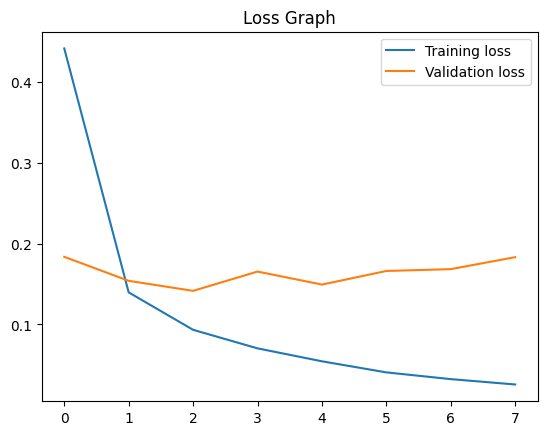

In [53]:
#plot metrics graphs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Graph')
plt.legend(['Training loss','Validation loss'])
plt.show()

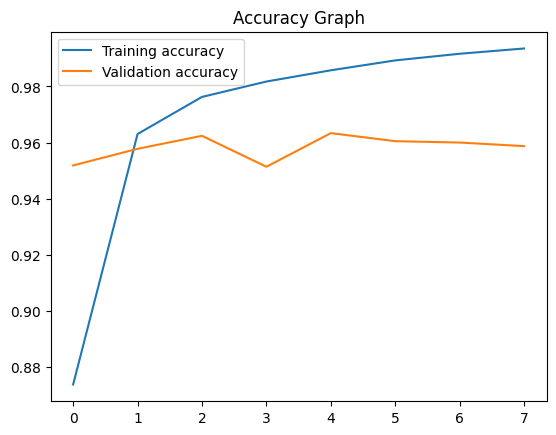

In [54]:
#plot metrics graphs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.legend(['Training accuracy','Validation accuracy'])
plt.show()